In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('balance-scale.csv')

In [3]:
df.head()

,class name,left-weight,left-distance,right-weight,right-distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


In [4]:
df.shape

(625, 5)

In [5]:
df.isnull().sum()

class name        0
left-weight       0
left-distance     0
right-weight      0
right-distance    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 5 columns):
class name        625 non-null object
left-weight       625 non-null int64
left-distance     625 non-null int64
right-weight      625 non-null int64
right-distance    625 non-null int64
dtypes: int64(4), object(1)
memory usage: 24.5+ KB


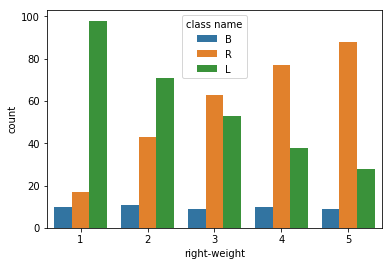

In [7]:
sns.countplot(df['right-weight'],hue="class name",data=df)

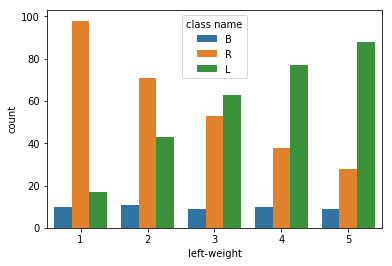

In [8]:
sns.countplot(df['left-weight'],hue="class name",data=df)

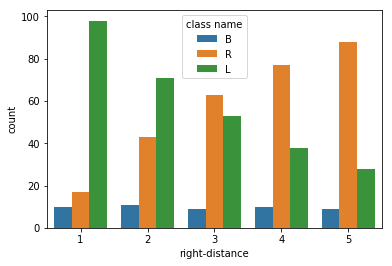

In [9]:
sns.countplot(df['right-distance'],hue="class name",data=df)

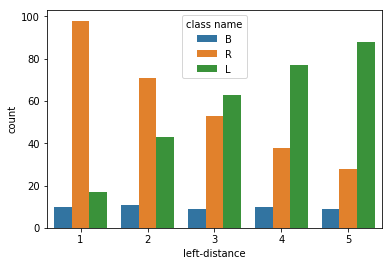

In [10]:
sns.countplot(df['left-distance'],hue="class name",data=df)

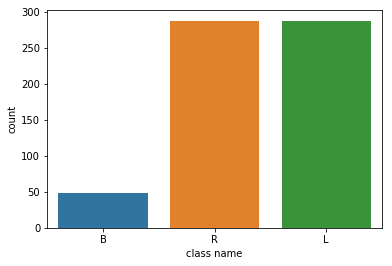

In [11]:
sns.countplot(df['class name'])

In [12]:
df['class name'].value_counts()

R    288
L    288
B     49
Name: class name, dtype: int64

In [13]:
from sklearn.utils import resample
df_R = df[df['class name']=='R']
df_L = df[df['class name']=='L']
df_B = df[df['class name']=='B']

df_BNew = resample(df_B,replace=True,n_samples=288,random_state=123) 
 
df_new = pd.concat([df_R, df_L, df_BNew])

In [14]:
df_new.shape

(864, 5)

In [15]:
df_new['class name'].value_counts()

L    288
R    288
B    288
Name: class name, dtype: int64

In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_new['class name']=le.fit_transform(df_new['class name'])

In [17]:
x=df_new.iloc[:,1:]
x.head()

,left-weight,left-distance,right-weight,right-distance
1,1,1,1,2
2,1,1,1,3
3,1,1,1,4
4,1,1,1,5
5,1,1,2,1


In [18]:
y=df_new.iloc[:,0]
y.head()

1    2
2    2
3    2
4    2
5    2
Name: class name, dtype: int32

In [19]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=56,stratify=y)

In [20]:
print(x_train.shape,x_test.shape)

(604, 4) (260, 4)


In [21]:
print(y_train.shape,y_test.shape)

(604,) (260,)


In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier

In [23]:
KNN=KNeighborsClassifier()
SV=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier(criterion='entropy',random_state=19)
GNB=GaussianNB()
RFC=RandomForestClassifier(random_state=19)
GBC=GradientBoostingClassifier(random_state=19)
ABC=AdaBoostClassifier(n_estimators=80,random_state=19)
ETC=ExtraTreesClassifier(criterion='entropy',random_state=19)

In [24]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SV))
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier', DT))
models.append(('GaussianNB', GNB))
models.append(('RandomForestClassifier', RFC))
models.append(('GradientBoostingClassifier', GBC))
models.append(('ExtraTreesClassifier',ETC))
models.append(('AdaBoostClassifier',ABC))

In [25]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

*********************** KNeighborsClassifier ***********************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')


Accuracy_score =  0.8153846153846154


Cross_Val_Score =  0.766215106732348


classification_report
               precision    recall  f1-score   support

           0       0.67      0.91      0.77        87
           1       0.89      0.76      0.82        87
           2       0.99      0.78      0.87        86

   micro avg       0.82      0.82      0.82       260
   macro avg       0.85      0.82      0.82       260
weighted avg       0.85      0.82      0.82       260



[[79  8  0]
 [20 66  1]
 [19  0 67]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


*********************** SVC ***********************


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf

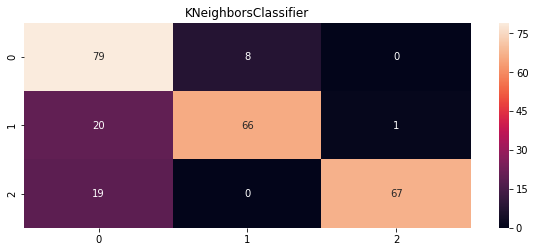

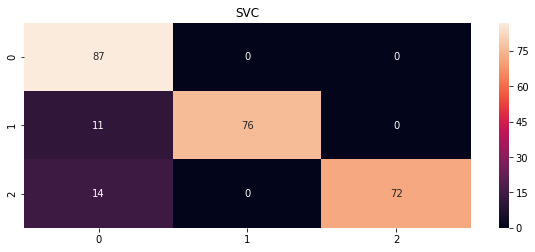

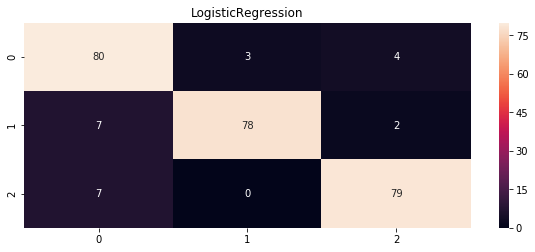

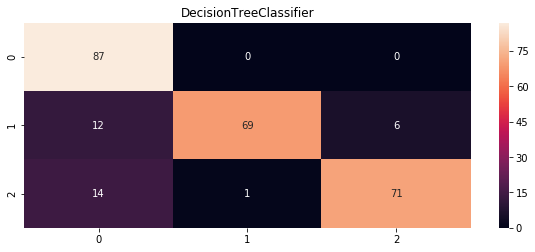

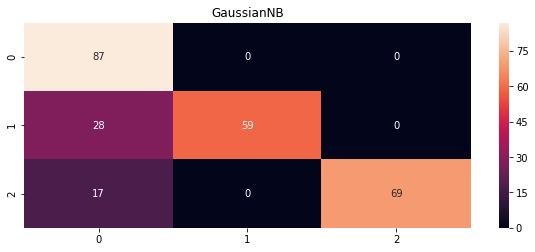

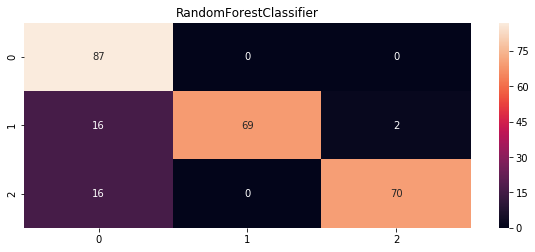

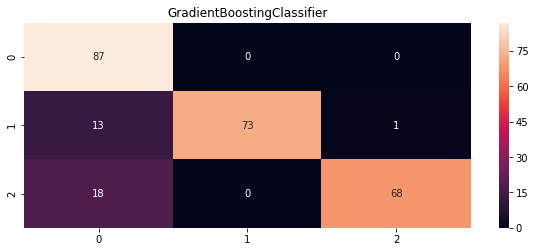

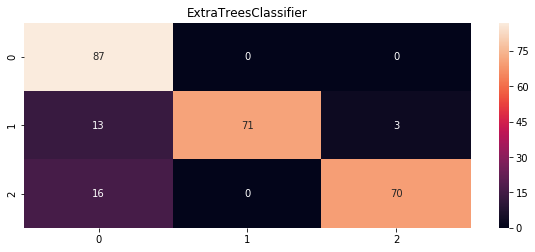

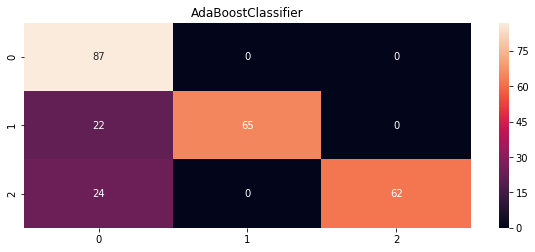

In [26]:
Model = []
score = []
cvs=[]
for name,model in models:
    print('***********************',name,'***********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score = ',AS)
    score.append(AS*100)
    print('\n')
    sc = cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    print('\n')
    

In [27]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score ,'Cross_val_score':cvs})
result

,Model,Accuracy_score,Cross_val_score
0,KNeighborsClassifier,81.538462,76.621511
1,SVC,90.384615,87.475369
2,LogisticRegression,91.153846,91.904762
3,DecisionTreeClassifier,87.307692,79.367816
4,GaussianNB,82.692308,69.995895
5,RandomForestClassifier,86.923077,76.830870
6,GradientBoostingClassifier,87.692308,78.784893
7,ExtraTreesClassifier,87.692308,79.018883
8,AdaBoostClassifier,82.307692,77.935140


**Finding best Hyperparameter for Support vector machine**

In [28]:
from sklearn.model_selection import GridSearchCV
parameterSV={
           'kernel' : ['rbf','linear','poly'],
           'C' : [ 1, 10,100,1000]
        }
gridSV = GridSearchCV(SV, param_grid=parameterSV, n_jobs=-1, cv=5)
gridSV.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'kernel': ['rbf', 'linear', 'poly'], 'C': [1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [29]:
gridSV.best_score_ , gridSV.best_params_

(0.9966887417218543, {'C': 1, 'kernel': 'poly'})

In [30]:
SV=SVC(C= 1.0, kernel= 'poly')
SV.fit(x_train,y_train)
score=cross_val_score(SV,x,y,cv=10,scoring='accuracy').mean()
score

0.9941707717569785

**Finding best Hyperparameter for RandomForestClassifier**

In [31]:
parameterRFC = { 
            "n_estimators"      : [20,30,40,50,60,80,100],
            "criterion"         :['gini','entropy'],
            "max_features"      : ["auto", "sqrt", "log2"],
            "max_depth"         :[2,3,4,5,6,None]
            }
gridRFC = GridSearchCV(RFC, param_grid=parameterRFC, n_jobs=-1, cv=10)
gridRFC.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=19, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [20, 30, 40, 50, 60, 80, 100], 'criterion': ['gini', 'entropy'], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [2, 3, 4, 5, 6, None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [32]:
gridRFC.best_score_ , gridRFC.best_params_

(0.8758278145695364,
 {'criterion': 'gini',
  'max_depth': None,
  'max_features': 'auto',
  'n_estimators': 50})

In [33]:
RFC=RandomForestClassifier(max_features= 'auto', n_estimators= 50,criterion='gini',max_depth=None)
RFC.fit(x_train,y_train)
score=cross_val_score(RFC,x,y,cv=10,scoring='accuracy').mean()
score

0.7704022988505747

**Finding best Hyperparameter for ExtraTreesClassifier**

In [34]:
parameterETC = { 
            "n_estimators"      : [60,80,100],
            "max_features"      : ["auto", "sqrt", "log2"],
            }
gridETC = GridSearchCV(ETC, param_grid=parameterETC, n_jobs=-1, cv=10)
gridETC.fit(x_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='entropy',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=19, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [60, 80, 100], 'max_features': ['auto', 'sqrt', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [35]:
gridETC.best_score_ , gridETC.best_params_

(0.9006622516556292, {'max_features': 'auto', 'n_estimators': 60})

In [36]:
ETC=ExtraTreesClassifier(max_features= 'auto', n_estimators= 60,random_state=19)
ETC.fit(x_train,y_train)
score=cross_val_score(ETC,x,y,cv=10,scoring='accuracy').mean()
score

0.7947454844006568

**Finding best Hyperparameter for GradientBoostingClassifier**

In [37]:
parameterGBC = {'learning_rate': [0.01,0.02,0.03],
                  'subsample'    : [0.9, 0.5, 0.2],
                  'n_estimators' : [100,500,1000],
                  'max_depth'    : [4,6,8] 
                 }
gridGBC = GridSearchCV(GBC, param_grid=parameterGBC, n_jobs=-1, cv=10)
gridGBC.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'learning_rate': [0.01, 0.02, 0.03], 'subsample': [0.9, 0.5, 0.2], 'n_estimators': [100, 500, 1000], 'max_depth': [4, 6, 8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [38]:
gridGBC.best_score_ , gridGBC.best_params_

(0.9105960264900662,
 {'learning_rate': 0.03,
  'max_depth': 4,
  'n_estimators': 1000,
  'subsample': 0.9})

In [39]:
GBC=GradientBoostingClassifier(learning_rate = 0.03,
  max_depth = 4,
  n_estimators = 1000,
  subsample= 0.9)
GBC.fit(x_train,y_train)
score=cross_val_score(GBC,x,y,cv=10,scoring='accuracy')

In [40]:
score.mean()

0.8401888341543515

**After performing HyperParameter tuning .The support vector machine  is working very well**

 **Best_parameter for svc {'C': 1, 'kernel': 'poly'}**

**Accuracy_score =  0.9966887417218543**

**Cross_val_score = 0.9941707717569785**

In [41]:
from sklearn.externals import joblib
joblib.dump(SV,'model_BalancedScale.csv')

['model_BalancedScale.csv']

In [42]:
model=joblib.load('model_BalancedScale.csv')

In [43]:
model.predict(x_test)

array([1, 2, 2, 2, 0, 0, 2, 0, 0, 2, 0, 2, 1, 1, 2, 2, 0, 2, 2, 0, 0, 0,
       2, 2, 2, 1, 2, 2, 1, 0, 2, 0, 1, 0, 0, 0, 1, 2, 2, 2, 0, 2, 2, 2,
       1, 2, 0, 0, 2, 2, 0, 1, 0, 2, 1, 0, 1, 1, 1, 2, 0, 0, 1, 0, 1, 1,
       2, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 2, 1, 0, 0, 1, 1, 1, 1, 1, 2, 0,
       2, 2, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 2, 1, 2, 2, 2, 1, 1, 2, 2, 0,
       2, 1, 0, 2, 0, 1, 1, 2, 0, 1, 2, 2, 1, 2, 0, 1, 2, 0, 1, 2, 0, 0,
       1, 0, 2, 2, 2, 1, 2, 1, 1, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 0, 1,
       1, 1, 0, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 0, 1, 1, 0, 0, 0, 2, 0, 2,
       2, 0, 2, 1, 2, 1, 0, 1, 0, 2, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       2, 0, 2, 1, 1, 1, 2, 1, 2, 2, 0, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1,
       1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 1, 0, 1, 1, 0, 0, 2, 0, 0, 1, 2,
       0, 0, 0, 2, 2, 0, 2, 0, 2, 1, 0, 0, 0, 1, 0, 1, 0, 1])